# Tarefa 2 - Regressão Linear

Disciplina de Introdução ao Aprendizado de Máquina - 2024.1

Professor: João Carlos Pereira da Silva

Aluno: Manoel Marcelo da Silva (121088349)

In [277]:
from numpy import dot
from numpy.linalg import inv
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

## Funções

In [278]:
def linearRegressionModel(X, y):
    """
    This function calculates the coefficients of a linear regression model
    
    Parameters:
    X: numpy array of shape (m, n) - the matrix of features
    y: numpy array of shape (m, 1) - the target vector

    Returns:
    numpy array of shape (n, 1) - the coefficients of the linear regression model
    in the form of a column vector
    """
    # adding a column of ones to the matrix of features
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    return dot(dot(inv(dot(X.T, X)), X.T), y)

In [279]:
def RSS(y, y_pred):
    """
    This function calculates the residual sum of squares (RSS) of a linear regression model
    
    Parameters:
    y: numpy array of shape (m, 1) - the target vector
    y_pred: numpy array of shape (m, 1) - the predicted target vector

    Returns:
    float - the residual sum of squares (RSS) of the linear regression model
    """
    return sum((y - y_pred)**2)

In [280]:
def RSE(y, y_pred):
    """
    This function calculates the residual standard error (RSE) of a linear regression model
    
    Parameters:
    y: numpy array of shape (m, 1) - the target vector
    y_pred: numpy array of shape (m, 1) - the predicted target vector

    Returns:
    float - the residual standard error (RSE) of the linear regression model
    """
    return np.sqrt(RSS(y, y_pred) / (len(y) - 2))

In [281]:
def SEM(X, y, y_pred):
    """
    This function calculates the standard error of the model (SEM) of a linear regression model
    
    Parameters:
    X: numpy array of shape (m, n) - the matrix of features
    y: numpy array of shape (m, 1) - the target vector
    y_pred: numpy array of shape (m, 1) - the predicted target vector

    Returns:
    numpy array of shape (n, 1) - the standard error of the model (SEM) of the linear regression model
    in the form of a column vector
    """
    
    # adding a column of ones to the matrix of features
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    return RSE(y, y_pred) * np.sqrt(np.diag(inv(dot(X.T, X))))

### Testando a implementação

In [282]:
# Dados baseados no exemplo do slide 5
X = np.array([[1.4, 0.9], [2.6, 1.8], [3.7, 3.5], [5.5, 3.9], [4.9, 5.6]])

Y = np.array([0.7, 1.3, 2.0, 3.6, 3.9])

In [283]:
beta = linearRegressionModel(X, Y)
print("Beta:", beta)

Y_pred = dot(np.hstack((np.ones((X.shape[0], 1)), X)), beta) # adding a column of ones to the matrix of features
print("Y_pred:", Y_pred)

print("RSS:", RSS(Y, Y_pred))
print("RSE:", RSE(Y, Y_pred))
print("SEM:", SEM(X, Y, Y_pred))

print('Intervalo de confiança 95%:', beta - 2 * SEM(X, Y, Y_pred), beta + 2 * SEM(X, Y, Y_pred))

Beta: [-0.50874313  0.51060702  0.30584258]
Y_pred: [0.48136502 1.36935178 2.45095189 3.49238157 3.70594974]
RSS: 0.3052057598138079
RSE: 0.318959642072895
SEM: [0.38225924 0.20941159 0.18979172]
Intervalo de confiança 95%: [-1.2732616   0.09178385 -0.07374086] [0.25577534 0.9294302  0.68542602]


In [284]:
# Comparando resultados com o sklearn
reg = linear_model.LinearRegression()
reg.fit(X, Y)
print("Beta (sklearn):", reg.coef_)
print("Intercept (sklearn):", reg.intercept_)
print("Y_pred (sklearn):", reg.predict(X))
print("RSS (sklearn):", mean_squared_error(Y, reg.predict(X)) * len(Y))
print("RSE (sklearn):", np.sqrt(mean_squared_error(Y, reg.predict(X))))


Beta (sklearn): [0.51060702 0.30584258]
Intercept (sklearn): -0.5087431326054279
Y_pred (sklearn): [0.48136502 1.36935178 2.45095189 3.49238157 3.70594974]
RSS (sklearn): 0.30520575981380793
RSE (sklearn): 0.2470650763721202


## Analisando o Exercício 1

In [285]:
# Importing the dataset of exercise 1
ex1 = pd.read_csv('exercicio1.csv')
ex1.head()

,X1,X2,Y
0,4.0,8,33
1,4.5,9,42
2,5.0,10,45
3,5.5,11,51
4,6.0,12,53


In [286]:
# Linear regression model using the sklearn library

linearReg = linear_model.LinearRegression()
X = ex1.iloc[:, 0:2] # X1 and X2 columns
y = ex1.iloc[:, 2:3] # Y column

linearReg.fit(X, y)

# Coefficients of the linear regression model
print('Coefficients of the linear regression model using the sklearn library:', linearReg.coef_)
print('Intercept of the linear regression model using the sklearn library:', linearReg.intercept_)

Coefficients of the linear regression model using the sklearn library: [[1.9 3.8]]
Intercept of the linear regression model using the sklearn library: [-2.67857143]


In [287]:
# Linear regression model using the linearRegressionModel function

coeff = linearRegressionModel(X.values, y.values)
print('Coefficients of the linear regression model using the linearRegressionModel function:')
print(coeff) # Infinite solutions # Não há inversa - determinante = 0

LinAlgError: Singular matrix

## Análise do Advertising Dataset

In [288]:
# Using database from Advertising.csv

ad = pd.read_csv('Advertising.csv')
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [289]:
pearsonCorrelation = ad.corr('pearson') # Correlation matrix

# Creating a heatmap of the correlation matrix using pandas
heatmapPearson = pearsonCorrelation.style.background_gradient(cmap='coolwarm')
heatmapPearson


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [290]:
# Pearson using Scipy
# Solution from https://stackoverflow.com/questions/74537135/how-to-get-p-value-and-pearsons-r-for-a-list-of-columns-in-pandas

def pearsonr_pval(x, y):
    return pearsonr(x, y)[1]

df = (
    pd.concat(
        [
            ad.corr(method="pearson").reset_index().assign(value="r"),
            ad.corr(method=pearsonr_pval).reset_index().assign(value="p"),
        ]
    )
    .groupby(["index", "value"])
    .agg(lambda x: list(x)[0])
).sort_index(ascending=[True, False])

df.index.names = ["", ""]

print(df)

                       TV         radio     newspaper         sales
                                                                   
TV        r  1.000000e+00  5.480866e-02  5.664787e-02  7.822244e-01
          p  1.000000e+00  4.408061e-01  4.256018e-01  1.467390e-42
newspaper r  5.664787e-02  3.541038e-01  1.000000e+00  2.282990e-01
          p  4.256018e-01  2.688835e-07  1.000000e+00  1.148196e-03
radio     r  5.480866e-02  1.000000e+00  3.541038e-01  5.762226e-01
          p  4.408061e-01  1.000000e+00  2.688835e-07  4.354966e-19
sales     r  7.822244e-01  5.762226e-01  2.282990e-01  1.000000e+00
          p  1.467390e-42  4.354966e-19  1.148196e-03  1.000000e+00


In [291]:
spearmanCorrelation = ad.corr('spearman') # Correlation matrix

# Creating a heatmap of the correlation matrix using pandas
heatmapSpearman = spearmanCorrelation.style.background_gradient(cmap='coolwarm')
heatmapSpearman

,TV,radio,newspaper,sales
TV,1.000000,0.056123,0.050840,0.800614
radio,0.056123,1.000000,0.316979,0.554304
newspaper,0.050840,0.316979,1.000000,0.194922
sales,0.800614,0.554304,0.194922,1.000000


In [292]:
# Spearman using Scipy and finding p-value

def spearmanr_pval(x, y):
    return spearmanr(x, y)[1]

df = (
    pd.concat(
        [
            ad.corr(method="spearman").reset_index().assign(value="r"),
            ad.corr(method=spearmanr_pval).reset_index().assign(value="p"),
        ]
    )
    .groupby(["index", "value"])
    .agg(lambda x: list(x)[0])
).sort_index(ascending=[True, False])

df.index.names = ["", ""]

print(df)

                       TV         radio  newspaper         sales
                                                                
TV        r  1.000000e+00  5.612339e-02   0.050840  8.006144e-01
          p  1.000000e+00  4.299063e-01   0.474647  6.379235e-46
newspaper r  5.083973e-02  3.169795e-01   1.000000  1.949219e-01
          p  4.746472e-01  4.804415e-06   1.000000  5.676351e-03
radio     r  5.612339e-02  1.000000e+00   0.316979  5.543037e-01
          p  4.299063e-01  1.000000e+00   0.000005  1.665171e-17
sales     r  8.006144e-01  5.543037e-01   0.194922  1.000000e+00
          p  6.379235e-46  1.665171e-17   0.005676  1.000000e+00


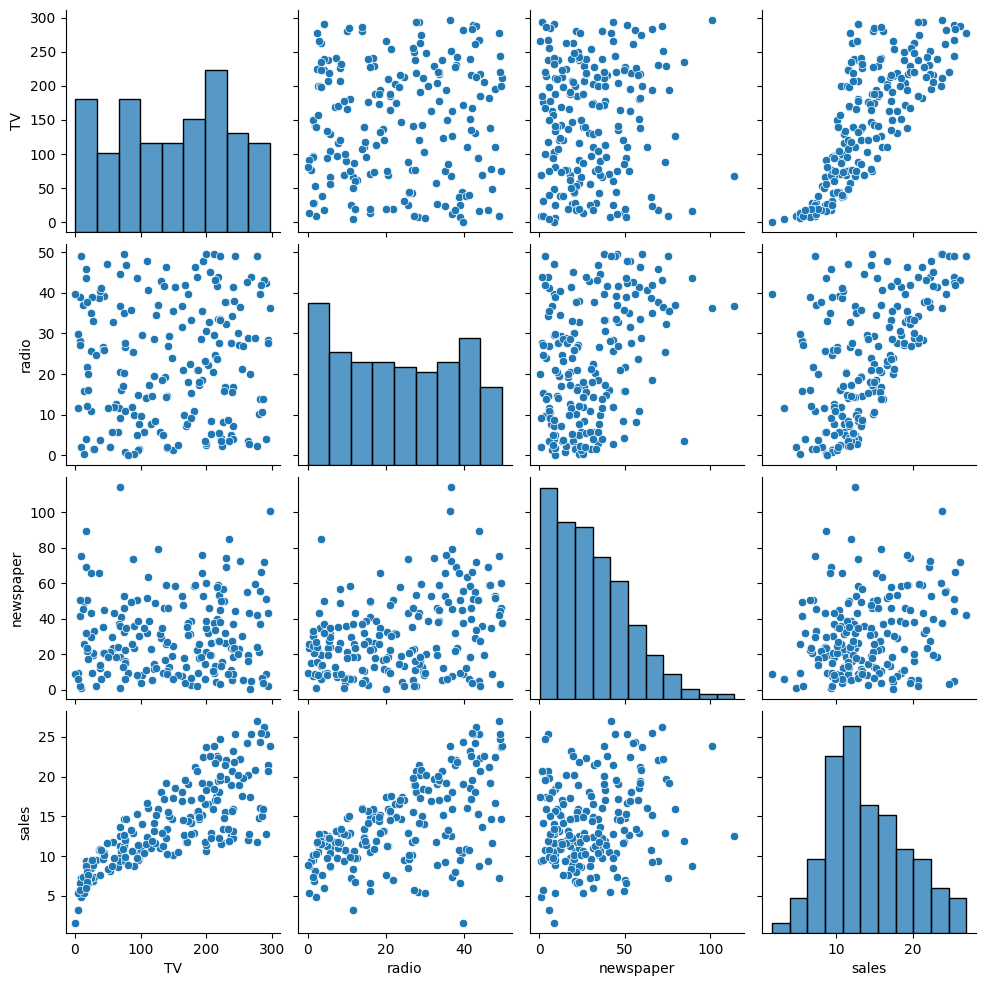

In [293]:
# Seaborn pairplot

sns.pairplot(ad)
plt.show()

### Regressão Linear usando TV e Newspaper

In [294]:
# Applying the linear regression model to the dataset

X = ad.iloc[:, 0::2] # TV and Newspaper columns
print(X)
y = ad.iloc[:, 3:4] # Sales column

        TV  newspaper
0    230.1       69.2
1     44.5       45.1
2     17.2       69.3
3    151.5       58.5
4    180.8       58.4
..     ...        ...
195   38.2       13.8
196   94.2        8.1
197  177.0        6.4
198  283.6       66.2
199  232.1        8.7

[200 rows x 2 columns]


In [295]:
# Usando a implementação acima

coeff = linearRegressionModel(X.values, y.values)
print('Coefficients of the linear regression model using the linearRegressionModel function:', coeff)

Y_pred = dot(np.hstack((np.ones((X.shape[0], 1)), X)), coeff) # adding a column of ones to the matrix of features


print('RSS:', RSS(y.values, Y_pred))
print('RSE:', RSE(y.values, Y_pred))
print('SEM:', SEM(X, y.values, Y_pred))

print('Intervalo de confiança 95 do ß0:', coeff[0] - 2 * SEM(X, y.values, Y_pred)[0], coeff[0] + 2 * SEM(X, y.values, Y_pred)[0])
print('Intervalo de confiança 95 do ß1:', coeff[1] - 2 * SEM(X, y.values, Y_pred)[1], coeff[1] + 2 * SEM(X, y.values, Y_pred)[1])
print('Intervalo de confiança 95 do ß2:', coeff[2] - 2 * SEM(X, y.values, Y_pred)[2], coeff[2] + 2 * SEM(X, y.values, Y_pred)[2])


Coefficients of the linear regression model using the linearRegressionModel function: [[5.77494797]
 [0.04690121]
 [0.04421942]]
RSS: [1918.5618119]
RSE: [3.11282928]
SEM: [0.5240095  0.00257433 0.01014837]
Intervalo de confiança 95 do ß0: [4.72692897] [6.82296696]
Intervalo de confiança 95 do ß1: [0.04175254] [0.05204988]
Intervalo de confiança 95 do ß2: [0.02392268] [0.06451617]


In [296]:
# Linear regression model using the sklearn library

ln = linearRegressionModel(X.values, y.values)
sklearn_ln = linear_model.LinearRegression().fit(X, y)
print('Coefficients of the linear regression model using the sklearn library:', ln)

Coefficients of the linear regression model using the sklearn library: [[5.77494797]
 [0.04690121]
 [0.04421942]]


### Regressão Linear usando Newspaper e Radio

In [297]:
# Applying the linear regression model to the dataset

X = ad.iloc[:, 1:3] # Radio and Newspaper columns
print(X)
y = ad.iloc[:, 3:4] # Sales column

     radio  newspaper
0     37.8       69.2
1     39.3       45.1
2     45.9       69.3
3     41.3       58.5
4     10.8       58.4
..     ...        ...
195    3.7       13.8
196    4.9        8.1
197    9.3        6.4
198   42.0       66.2
199    8.6        8.7

[200 rows x 2 columns]


In [298]:
# Usando a implementação acima

coeff = linearRegressionModel(X.values, y.values)
print('Coefficients of the linear regression model using the linearRegressionModel function:', coeff)

Y_pred = dot(np.hstack((np.ones((X.shape[0], 1)), X)), coeff) # adding a column of ones to the matrix of features


print('RSS:', RSS(y.values, Y_pred))
print('RSE:', RSE(y.values, Y_pred))
print('SEM:', SEM(X, y.values, Y_pred))

print('Intervalo de confiança 95 do ß0:', coeff[0] - 2 * SEM(X, y.values, Y_pred)[0], coeff[0] + 2 * SEM(X, y.values, Y_pred)[0])
print('Intervalo de confiança 95 do ß1:', coeff[1] - 2 * SEM(X, y.values, Y_pred)[1], coeff[1] + 2 * SEM(X, y.values, Y_pred)[1])
print('Intervalo de confiança 95 do ß2:', coeff[2] - 2 * SEM(X, y.values, Y_pred)[2], coeff[2] + 2 * SEM(X, y.values, Y_pred)[2])

Coefficients of the linear regression model using the linearRegressionModel function: [[9.18892046e+00]
 [1.99044594e-01]
 [6.64417452e-03]]
RSS: [3614.83527864]
RSE: [4.27279111]
SEM: [0.62608482 0.02181447 0.01487125]
Intervalo de confiança 95 do ß0: [7.93675083] [10.44109009]
Intervalo de confiança 95 do ß1: [0.15541566] [0.24267353]
Intervalo de confiança 95 do ß2: [-0.02309832] [0.03638667]


In [299]:
# Linear regression model using the sklearn library

ln = linearRegressionModel(X.values, y.values)
sklearn_ln = linear_model.LinearRegression().fit(X, y)
print('Coefficients of the linear regression model using the sklearn library:', ln)

Coefficients of the linear regression model using the sklearn library: [[9.18892046e+00]
 [1.99044594e-01]
 [6.64417452e-03]]


### Regressão Linear usando TV e Radio

In [300]:
# Applying the linear regression model to the dataset

X = ad.iloc[:, 0:2] # TV and Radio columns
print(X)
y = ad.iloc[:, 3:4] # Sales column


        TV  radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
..     ...    ...
195   38.2    3.7
196   94.2    4.9
197  177.0    9.3
198  283.6   42.0
199  232.1    8.6

[200 rows x 2 columns]


In [301]:
# Usando a implementação acima

coeff = linearRegressionModel(X.values, y.values)
print('Coefficients of the linear regression model using the linearRegressionModel function:', coeff)

Y_pred = dot(np.hstack((np.ones((X.shape[0], 1)), X)), coeff) # adding a column of ones to the matrix of features


print('RSS:', RSS(y.values, Y_pred))
print('RSE:', RSE(y.values, Y_pred))
print('SEM:', SEM(X, y.values, Y_pred))

print('Intervalo de confiança 95 do ß0:', coeff[0] - 2 * SEM(X, y.values, Y_pred)[0], coeff[0] + 2 * SEM(X, y.values, Y_pred)[0])
print('Intervalo de confiança 95 do ß1:', coeff[1] - 2 * SEM(X, y.values, Y_pred)[1], coeff[1] + 2 * SEM(X, y.values, Y_pred)[1])
print('Intervalo de confiança 95 do ß2:', coeff[2] - 2 * SEM(X, y.values, Y_pred)[2], coeff[2] + 2 * SEM(X, y.values, Y_pred)[2])


Coefficients of the linear regression model using the linearRegressionModel function: [[2.92109991]
 [0.04575482]
 [0.18799423]]
RSS: [556.91398007]
RSE: [1.67710968]
SEM: [0.29374508 0.00138684 0.00801964]
Intervalo de confiança 95 do ß0: [2.33360976] [3.50859006]
Intervalo de confiança 95 do ß1: [0.04298113] [0.0485285]
Intervalo de confiança 95 do ß2: [0.17195494] [0.20403351]


In [302]:
# Linear regression model using the sklearn library

ln = linearRegressionModel(X.values, y.values)
sklearn_ln = linear_model.LinearRegression().fit(X, y)
print('Coefficients of the linear regression model using the sklearn library:', ln)

Coefficients of the linear regression model using the sklearn library: [[2.92109991]
 [0.04575482]
 [0.18799423]]


### Regressão Linear usando TV, Radio e Newspaper

In [303]:
# Applying the linear regression model to the dataset

X = ad.iloc[:, 0:3] # TV, Radio and Newspaper columns
print(X)
y = ad.iloc[:, 3:4] # Sales column


        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [304]:
# Usando a implementação acima

coeff = linearRegressionModel(X.values, y.values)
print('Coefficients of the linear regression model using the linearRegressionModel function:', coeff)

Y_pred = dot(np.hstack((np.ones((X.shape[0], 1)), X)), coeff) # adding a column of ones to the matrix of features


print('RSS:', RSS(y.values, Y_pred))
print('RSE:', RSE(y.values, Y_pred))
print('SEM:', SEM(X, y.values, Y_pred))

print('Intervalo de confiança 95 do ß0:', coeff[0] - 2 * SEM(X, y.values, Y_pred)[0], coeff[0] + 2 * SEM(X, y.values, Y_pred)[0])
print('Intervalo de confiança 95 do ß1:', coeff[1] - 2 * SEM(X, y.values, Y_pred)[1], coeff[1] + 2 * SEM(X, y.values, Y_pred)[1])
print('Intervalo de confiança 95 do ß2:', coeff[2] - 2 * SEM(X, y.values, Y_pred)[2], coeff[2] + 2 * SEM(X, y.values, Y_pred)[2])
print('Intervalo de confiança 95 do ß3:', coeff[3] - 2 * SEM(X, y.values, Y_pred)[3], coeff[3] + 2 * SEM(X, y.values, Y_pred)[3])


Coefficients of the linear regression model using the linearRegressionModel function: [[ 2.93888937e+00]
 [ 4.57646455e-02]
 [ 1.88530017e-01]
 [-1.03749304e-03]]
RSS: [556.8252629]
RSE: [1.67697609]
SEM: [0.31032894 0.00138783 0.00856763 0.00584128]
Intervalo de confiança 95 do ß0: [2.31823148] [3.55954726]
Intervalo de confiança 95 do ß1: [0.04298898] [0.04854031]
Intervalo de confiança 95 do ß2: [0.17139475] [0.20566528]
Intervalo de confiança 95 do ß3: [-0.01272006] [0.01064507]


## Aplicando a Regressão Linear com treinamento e as 2 melhores features

In [305]:
# Tentando encontrar os dois melhores atributos de entrada, segundo spearman

X = ad.iloc[:, 0:3] # TV, Radio and Newspaper columns
y = ad.iloc[:, 3:4] # Sales column

spearmanCorrelation = ad.corr('spearman') # Correlation matrix
print(spearmanCorrelation)
# Logo os melhores atributos são TV e Radio
X = ad.iloc[:, 0:2] # TV and Radio columns
print(X)

                 TV     radio  newspaper     sales
TV         1.000000  0.056123   0.050840  0.800614
radio      0.056123  1.000000   0.316979  0.554304
newspaper  0.050840  0.316979   1.000000  0.194922
sales      0.800614  0.554304   0.194922  1.000000
        TV  radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
..     ...    ...
195   38.2    3.7
196   94.2    4.9
197  177.0    9.3
198  283.6   42.0
199  232.1    8.6

[200 rows x 2 columns]


Text(0.5, 1.0, 'RSS')

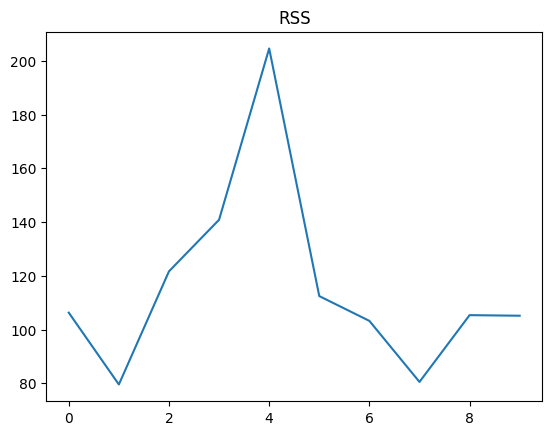

In [312]:
RSEs = []
RSSs = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    coeff = linearRegressionModel(X_train.values, y_train.values)
    Y_pred = dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), coeff)
    RSSs.append(RSS(y_test.values, Y_pred))
    RSEs.append(RSE(y_test.values, Y_pred))

plt.plot(RSSs)
plt.title('RSS')

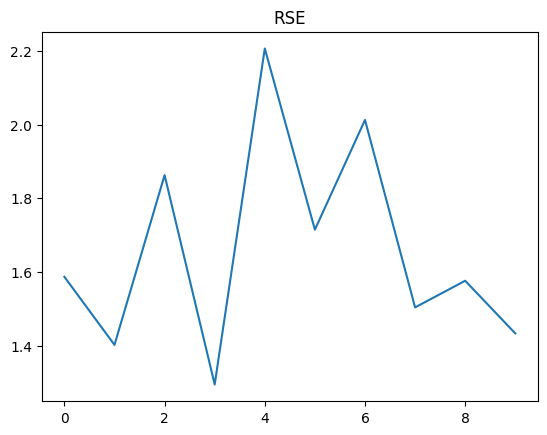

In [307]:
plt.plot(RSEs)
plt.title('RSE')
plt.show()

É perceptível que a separação dos conjuntos dos dados de treinamento e teste está impactando bastante nos RSS e RSE, muito provavelmente por conta na hora do treino não estão sendo usados dados mais diferentes, talvez esteja ocorrendo um overfitting.

## Regressão Linear com K-Fold no Advertising Dataset

### 5 splits

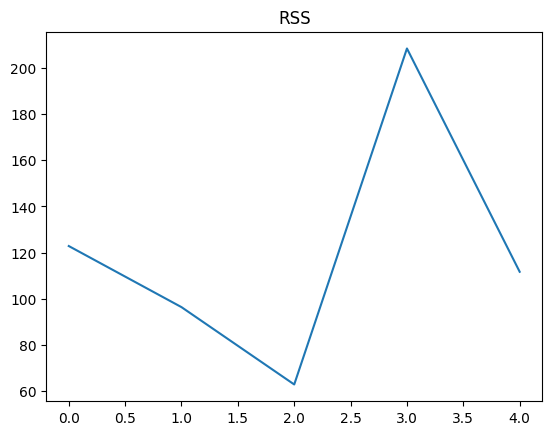

In [308]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

RSSs = []
RSEs = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    coeff = linearRegressionModel(X_train, y_train)
    Y_pred = dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), coeff)
    RSSs.append(RSS(y_test, Y_pred))
    RSEs.append(RSE(y_test, Y_pred))

plt.plot(RSSs)
plt.title('RSS')
plt.show()

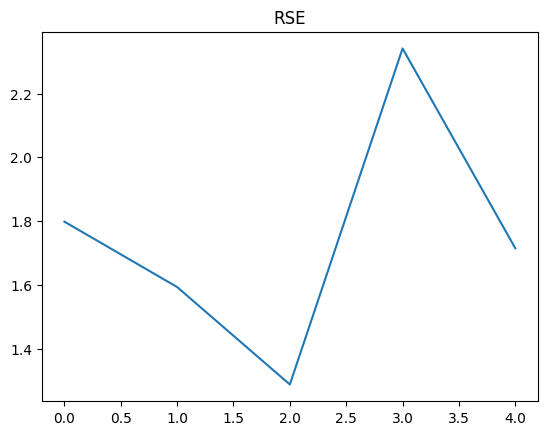

In [309]:
plt.plot(RSEs)
plt.title('RSE')
plt.show()

### 10 splits

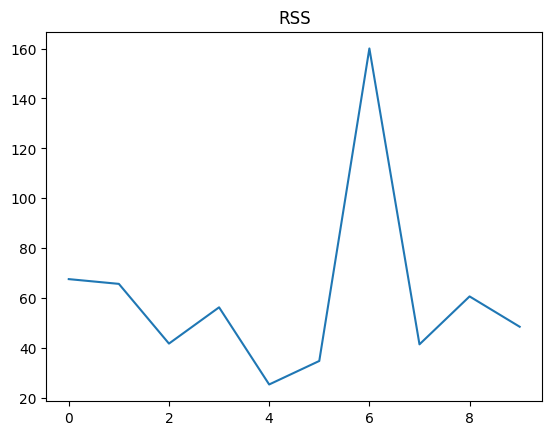

In [310]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

RSSs = []
RSEs = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    coeff = linearRegressionModel(X_train, y_train)
    Y_pred = dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), coeff)
    RSSs.append(RSS(y_test, Y_pred))
    RSEs.append(RSE(y_test, Y_pred))

plt.plot(RSSs)
plt.title('RSS')
plt.show()

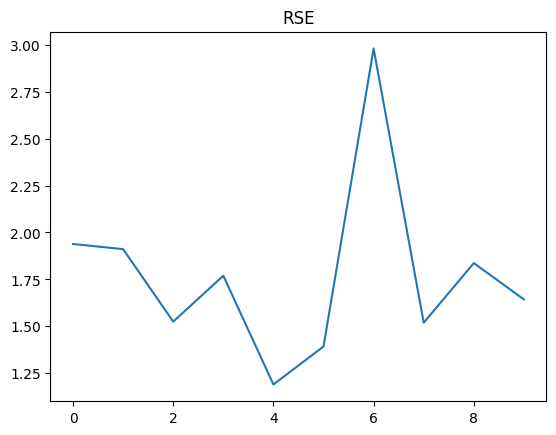

In [311]:
plt.plot(RSEs)
plt.title('RSE')
plt.show()